In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from wordcloud import WordCloud
%matplotlib inline

In [2]:
movies_df=pd.read_csv('tmdb_5000_movies.csv')
credits_df=pd.read_csv('tmdb_5000_credits.csv')

In [3]:
print(movies_df.shape)
movies_df.head()

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
col=movies_df.columns.to_list()
print('tmdb_5000_movies.csv\n')
for i in col:
    print(i)

tmdb_5000_movies.csv

budget
genres
homepage
id
keywords
original_language
original_title
overview
popularity
production_companies
production_countries
release_date
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count


In [5]:
movies_df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [6]:
print(credits_df.shape)
credits_df.head()

(4803, 4)


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [8]:
col=credits_df.columns.to_list()
print('tmdb_5000_credits.csv\n')
for i in col:
    print(i)

tmdb_5000_credits.csv

movie_id
title
cast
crew


# Data Cleaning
We'll try to remove null values and transform the data into a more understandable format

In [9]:
movies_df.loc[movies_df['title']!=movies_df['original_title']]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
215,130000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",NaN,1979,"[{""id"": 657, ""name"": ""fire""}, {""id"": 720, ""nam...",en,4: Rise of the Silver Surfer,The Fantastic Four return to the big screen as...,60.810723,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2007-06-13,289047763,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Discover the secret of the Surfer.,Fantastic 4: Rise of the Silver Surfer,5.4,2589
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,344466,[],ro,Lumea e a mea,Larisa is 16 and lives in a city by the sea. I...,0.327622,[],"[{""iso_3166_1"": ""RO"", ""name"": ""Romania""}]",2015-06-05,0,104.0,"[{""iso_639_1"": ""ro"", ""name"": ""Rom\u00e2n\u0103""}]",Released,NaN,The World Is Mine,0.0,0
4719,120000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,40652,"[{""id"": 1965, ""name"": ""sandstorm""}, {""id"": 151...",fr,Une femme mariée: Suite de fragments d'un film...,"Charlotte is young and modern, not a hair out ...",1.112792,"[{""name"": ""Orsay Films"", ""id"": 2325}, {""name"":...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}]",1964-12-04,0,95.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,She Loves Two Men... She is Married to One!,The Married Woman,7.1,20
4751,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,42109,[],pt,"Gabriela, Cravo e Canela","In 1925, Gabriela becomes cook, mistress, and ...",0.557602,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",1983-03-24,0,99.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,Gabriela,6.0,2
4790,0,"[{"

In [10]:
credits_df.rename(columns={'movie_id':'id'},inplace=True)
merged_df=movies_df.merge(credits_df, on='id')

In [11]:
merged_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
merged_df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64

In [13]:
merged_df[['overview','tagline']]=merged_df[['overview','tagline']].fillna('')

In [14]:
features=['homepage','production_countries','release_date','runtime','title_y','original_title']
merged_df.drop(features, axis=1, inplace=True)
merged_df=merged_df.rename(columns={'title_x':'title'})
merged_df.head()

,budget,genres,id,keywords,original_language,overview,popularity,production_companies,revenue,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2787965087,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",961000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",880674609,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",1084939099,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",284139100,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [15]:
categories={
    "status":{"Released":0, "Post Production":1,"Rumored":2}
}
merged_df=merged_df.replace(categories)

In [16]:
merged_df.loc[merged_df['status']!=0]

2021-07-16 17:55:23.803 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


,budget,genres,id,keywords,original_language,overview,popularity,production_companies,revenue,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
2906,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",357837,"[{""id"": 246, ""name"": ""dancing""}, {""id"": 271, ""...",cs,"This coming of age Dance Film, in the spirit o...",0.186234,[],0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,Dancin' Like You've Never Seen Before,Dancin' It's On,4.3,2,"[{""cast_id"": 0, ""character"": ""Jennifer"", ""cred...","[{""credit_id"": ""55e85c30c3a3682c62002869"", ""de..."
4169,1900000,"[{""id"": 18, ""name"": ""Drama""}]",295886,[],en,West Philadelphia basketball star Sergio Taylo...,1.367751,[],0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,,Brotherly Love,6.9,21,"[{""cast_id"": 1, ""character"": ""Jackie Taylor"", ...","[{""credit_id"": ""54d3585cc3a3686ab90036ff"", ""de..."
4178,2000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",50875,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 1157, ""n...",en,A chronicle of one woman's lifelong struggle w...,1.699101,[],841733,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,,Higher Ground,5.3,14,"[{""cast_id"": 6, ""character"": ""Corinne Walker"",...","[{""credit_id"": ""52fe47dac3a36847f814bcb5"", ""de..."
4401,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",43630,[],en,,0.020600,[],0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",2,,The Helix... Loaded,4.8,2,[],[]
4453,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",57294,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 97...",en,Powerfully redemptive and darkly comedic reven...,0.108135,"[{""name"": ""Scottish Screen"", ""id"": 698}, {""nam...",0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",2,A Bad Trip Down Memory Lane,Crying with Laughter,7.0,1,"[{""cast_id"": 3, ""character"": ""Joey Frisk"", ""cr...","[{""credit_id"": ""52fe492dc3a36847f818d031"", ""de..."
4508,56000,"[{""id"": 99, ""name"": ""Documentary""}]",70875,"[{""id"": 1729, ""name"": ""migration""}, {""id"": 190...",en,The story of the children who work 12-14 hour ...,0.010909,[],0,[],2,,The Harvest (La Cosecha),0.0,0,[],"[{""credit_id"": ""52fe4816c3a368484e0e8bbd"", ""de..."
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]",0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",2,,Little Big Top,10.0,1,"[{""cast_id"": 0, ""character"": ""Seymour"", ""credi...",[]
4754,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",84659,[],en,The Naked Ape is a coming-of-age film followin...,0.077577,[],0,[],2,,The Naked Ape,5.0,1,"[{""cast_id"": 1, ""character"": ""Alex"", ""credit_i...","[{""credit_id"": ""52fe49049251416c910a00b3"", ""de..."


### Calculating Weighted Rating IMDB

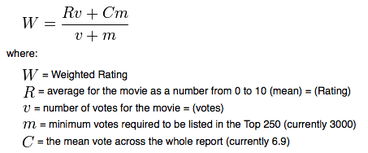

In [17]:
r=merged_df['vote_average']
v=merged_df['vote_count']
c=r.mean()
m=v.quantile(.90)
weighted_rating=(r*v + c*m)/(v+m)
merged_df['weighted_rating']=weighted_rating
merged_df.head()

,budget,genres,id,keywords,original_language,overview,popularity,production_companies,revenue,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,weighted_rating
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2787965087,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",0,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",961000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",880674609,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",0,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",1084939099,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",0,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.346721
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",284139100,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",0,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.096368


In [18]:
std_popularity = merged_df['popularity'].std()
std_rating = merged_df['weighted_rating'].std()
merged_df['popularity_norm'] = merged_df['popularity']/std_popularity
merged_df['rating_norm'] = merged_df['weighted_rating']/std_rating
merged_df['score'] = (merged_df['popularity_norm'] + merged_df['rating_norm'])/2
merged_df.head()

,budget,genres,id,keywords,original_language,overview,popularity,production_companies,revenue,spoken_languages,...,tagline,title,vote_average,vote_count,cast,crew,weighted_rating,popularity_norm,rating_norm,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2787965087,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",...,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669,4.728266,25.874065,15.301166
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",961000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696,4.371378,24.461317,14.416348
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",880674609,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",...,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396,3.374862,22.896910,13.135886
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",1084939099,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.346721,3.530006,26.960494,15.245250
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",284139100,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.096368,1.380629,22.372035,11.876332


# EDA

Text(0.5, 0, 'Vote Average')

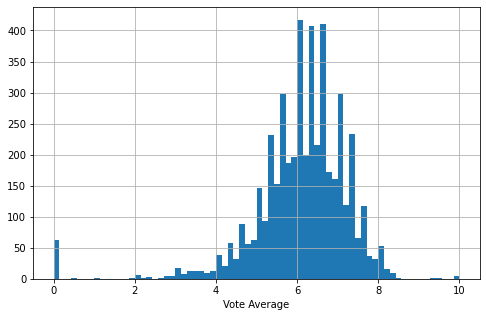

In [19]:
plt.figure(figsize=(8,5))
merged_df['vote_average'].hist(bins=70)
plt.xlabel('Vote Average')

Text(0.5, 0, 'Vote Count')

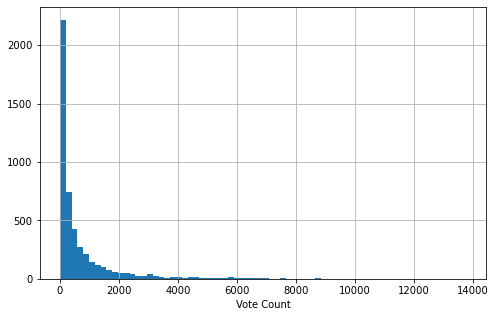

In [20]:
plt.figure(figsize=(8,5))
merged_df['vote_count'].hist(bins=70)
plt.xlabel('Vote Count')

Text(0, 0.5, 'Movie Title')

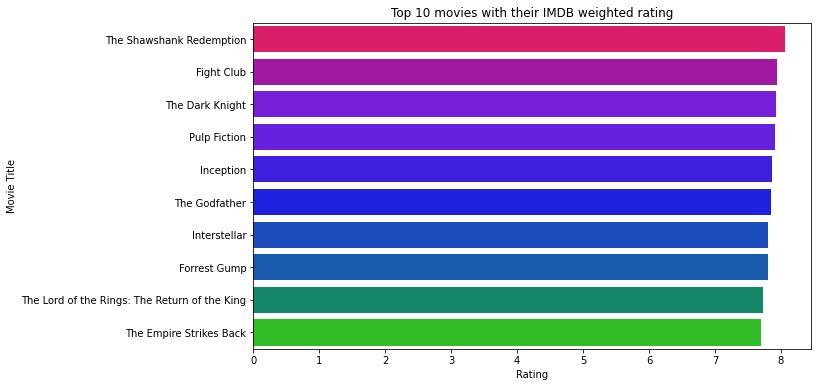

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x='weighted_rating',y='title',data=merged_df.sort_values(by='weighted_rating',ascending=False)[:10],palette='prism')
plt.title('Top 10 movies with their IMDB weighted rating')
plt.xlabel('Rating')
plt.ylabel('Movie Title')

Text(0, 0.5, 'Movie Title')

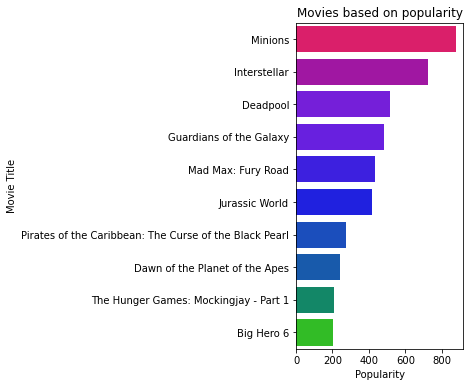

In [22]:
plt.figure(figsize=(3,6))
sns.barplot(x='popularity',y='title',data=merged_df.sort_values(by='popularity',ascending=False)[:10],palette='prism')
plt.title('Movies based on popularity')
plt.xlabel('Popularity')
plt.ylabel('Movie Title')

Text(0, 0.5, 'Movie Title')

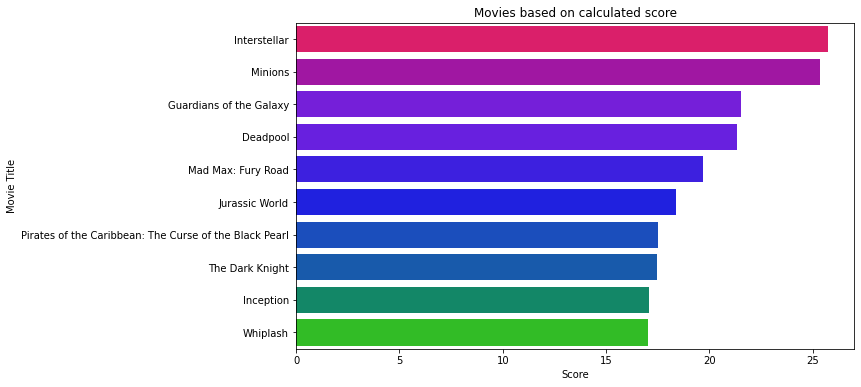

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='score',y='title',data=merged_df.sort_values(by='score',ascending=False)[:10],palette='prism')
plt.title('Movies based on calculated score')
plt.xlabel('Score')
plt.ylabel('Movie Title')

Text(0, 0.5, 'Popularity')

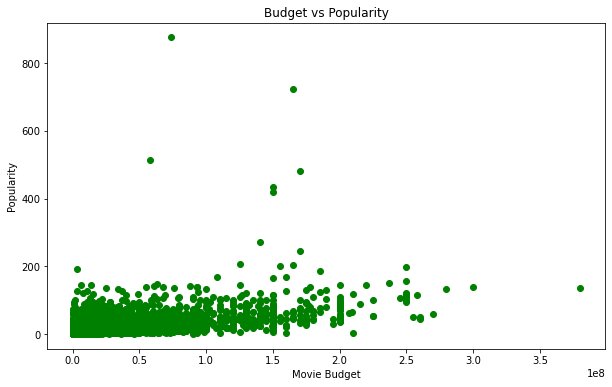

In [24]:
plt.figure(figsize = (10,6))
plt.scatter(x=merged_df['budget'],y=merged_df['popularity'],color='green')
plt.title('Budget vs Popularity')
plt.xlabel('Movie Budget')
plt.ylabel('Popularity')

Text(0, 0.5, 'Revenue')

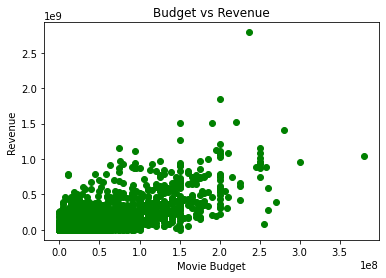

In [25]:
plt.scatter(x=merged_df['budget'],y=merged_df['revenue'],color='green')
plt.title('Budget vs Revenue')
plt.xlabel('Movie Budget')
plt.ylabel('Revenue')

In [26]:
movies_language=merged_df.groupby('original_language')['original_language'].count().sort_values(ascending=False)
others=movies_language[3:].sum()
#lang={'en':'English','fr':'French','es':'Spanish'}
lang=['English','French','Spanish']
pie_data=movies_language[:3]
pie_data.index=lang
pie_data['others']=others
pie_data

English    4505
French       70
Spanish      32
others      196
Name: original_language, dtype: int64

Text(0.5, 1.0, 'Movies and their Languages')

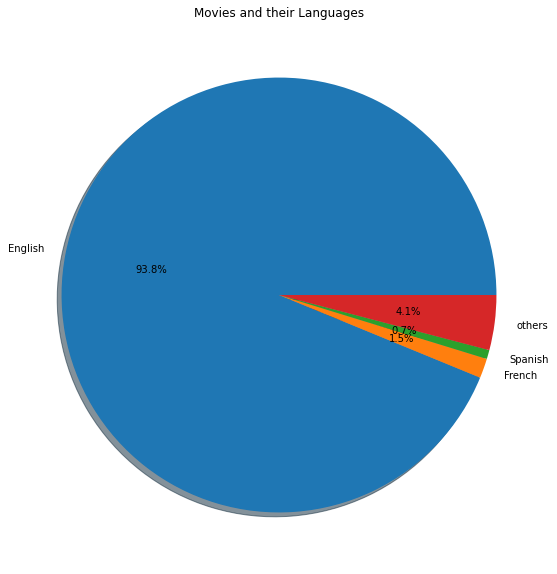

In [27]:
plt.figure(figsize=(10,10))
plt.pie(pie_data,labels=pie_data.index, autopct='%1.1f%%',shadow=True)
plt.title('Movies and their Languages')

In [28]:
merged_df.head()

,budget,genres,id,keywords,original_language,overview,popularity,production_companies,revenue,spoken_languages,...,tagline,title,vote_average,vote_count,cast,crew,weighted_rating,popularity_norm,rating_norm,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2787965087,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",...,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669,4.728266,25.874065,15.301166
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",961000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696,4.371378,24.461317,14.416348
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",880674609,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",...,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396,3.374862,22.896910,13.135886
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",1084939099,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.346721,3.530006,26.960494,15.245250
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",284139100,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.096368,1.380629,22.372035,11.876332


### Using Genres, Keywords, Cast and Crew to get recommendations

In [29]:
from ast import literal_eval

features=['genres','keywords','production_companies','cast','crew']
for feature in features:
    merged_df[feature]=merged_df[feature].apply(literal_eval)

In [30]:
merged_df['cast'][0]

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [31]:
#extracting the director of the movie
def extract_director(crew):
    for i in crew:
        if i['job']=='Director':
            return i['name'];
    return np.nan #Nan if no director

In [32]:
#extracting top 3 elements from each list
def get_top3(x):
    if isinstance(x,list):
        names=[i['name'] for i in x]
        if len(names)>3:
            return names[:3]
        return names
    return []

In [33]:
#extract cast
def extract_cast(x):
    if isinstance(x,list):
        male=[i['name'] for i in x if i['gender']==2]
        female=[i['name'] for i in x if i['gender']==1]
        names=[]
        if len(male)>3:
            names.extend(male[:3])
        else:
            names.extend(male)
        if len(female)>3:
            names.extend(female[:3])
        else:
            names.extend(female)
        return names
    return []

In [34]:
def remove_word_spaces(x):
    if isinstance(x,list):
        return [str.lower(i.replace(' ','')) for i in x]
    else: #must come from the director
        if isinstance(x,str):
            return str.lower(x.replace(' ',''))
        return '' #no director

In [35]:
#for overview and tagline
def remove_capital_letters(x):
    if isinstance(x,str):
        return str.lower(x)
    return ''

In [36]:
cast = merged_df['cast'].apply(extract_cast)
cast = cast.apply(remove_word_spaces)
cast = cast.tolist()
cast = list(np.concatenate(cast).flat)
cast = ' '.join(cast)
cast_cloud = WordCloud(collocations = False, background_color = 'white').generate(cast)

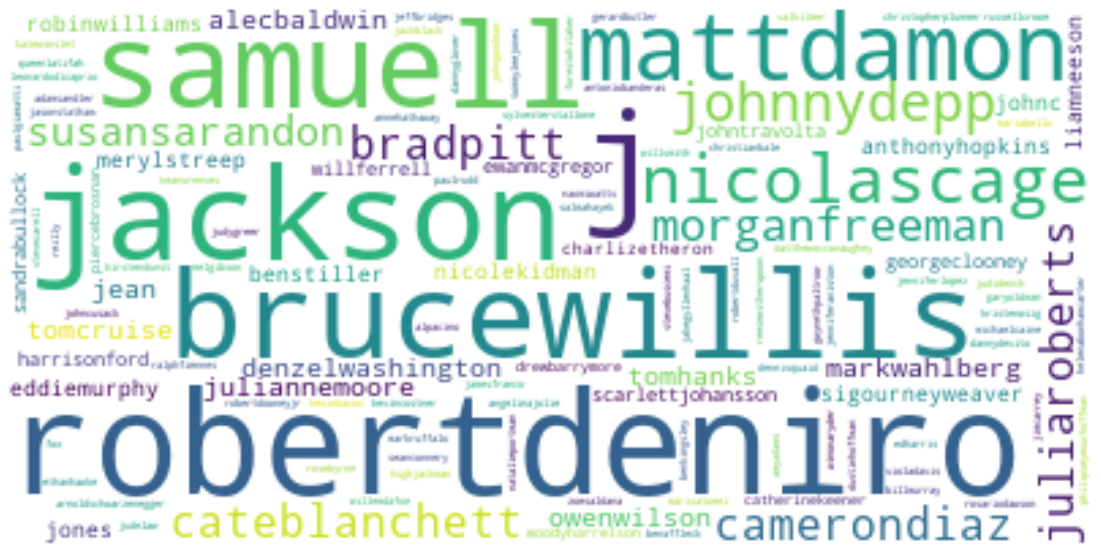

In [37]:
plt.figure(figsize=(20,10))
plt.imshow(cast_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
merged_df['director']=merged_df['crew'].apply(extract_director)
features=['genres','keywords','production_companies']
for feature in features:
    merged_df[feature]=merged_df[feature].apply(get_top3)
merged_df['cast']=merged_df['cast'].apply(extract_cast)

In [39]:
directors = merged_df['director']
directors = directors.apply(remove_word_spaces)
directors = directors.to_list()
directors = ' '.join(directors)
directors_cloud = WordCloud(collocations = False, background_color = 'white').generate(directors)

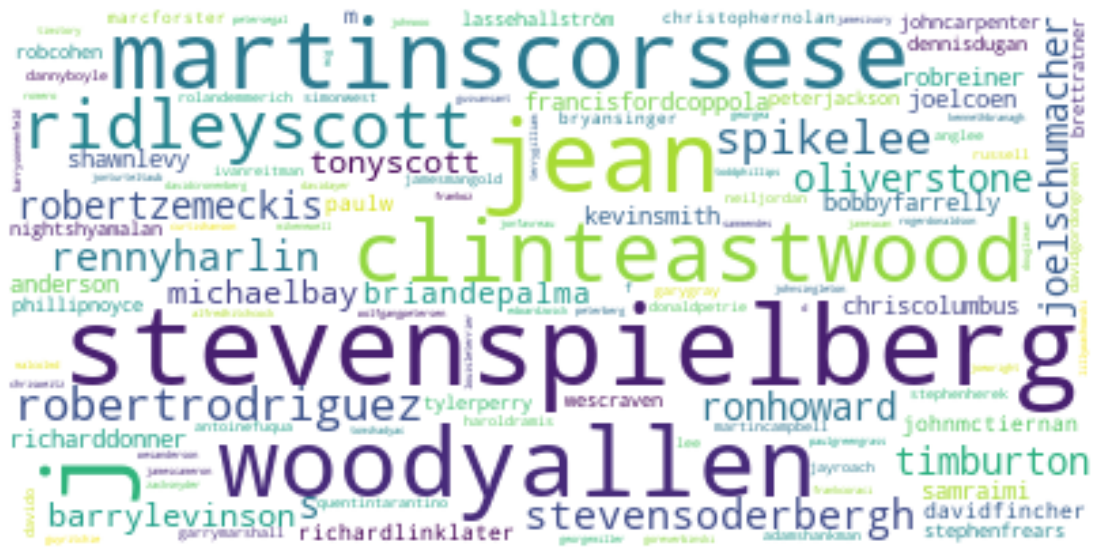

In [40]:
plt.figure(figsize=(20,10))
plt.imshow(directors_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
keywords = merged_df['keywords']
keywords = keywords.apply(remove_word_spaces)
keywords = keywords.to_list()
keywords = list(np.concatenate(keywords).flat)
keywords = ' '.join(keywords)
key_cloud = WordCloud(collocations = False, background_color = 'white').generate(keywords)

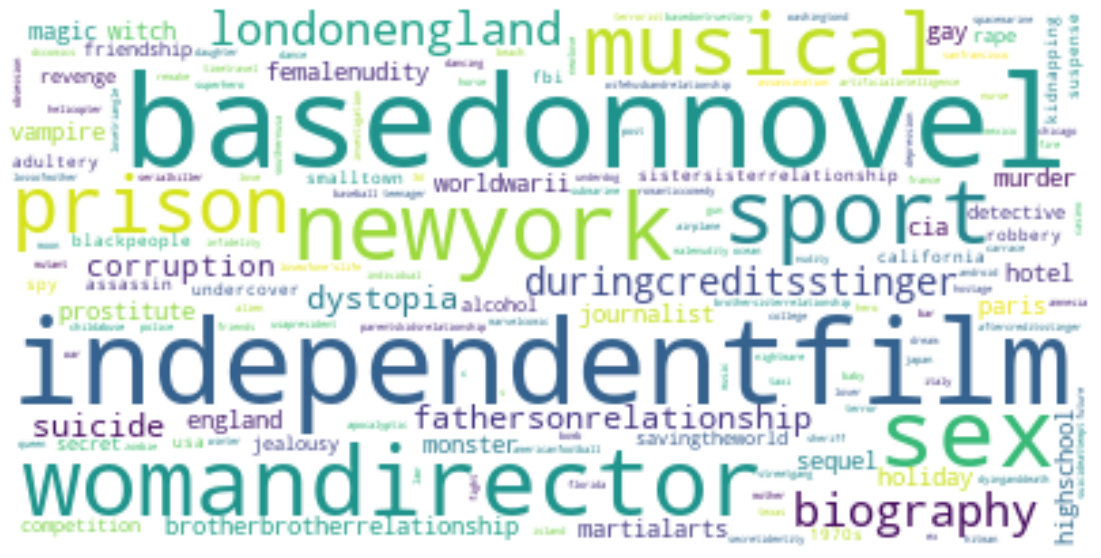

In [42]:
plt.figure(figsize=(20,10))
plt.imshow(key_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
features=['genres','keywords','production_companies','cast','director']
for feature in features:
    merged_df[feature] = merged_df[feature].apply(remove_word_spaces)

In [44]:
merged_df.head()

,budget,genres,id,keywords,original_language,overview,popularity,production_companies,revenue,spoken_languages,...,title,vote_average,vote_count,cast,crew,weighted_rating,popularity_norm,rating_norm,score,director
0,237000000,"[action, adventure, fantasy]",19995,"[cultureclash, future, spacewar]",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[ingeniousfilmpartners, twentiethcenturyfoxfil...",2787965087,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",...,Avatar,7.2,11800,"[samworthington, stephenlang, giovanniribisi, ...","[{'credit_id': '52fe48009251416c750aca23', 'de...",7.050669,4.728266,25.874065,15.301166,jamescameron
1,300000000,"[adventure, fantasy, action]",285,"[ocean, drugabuse, exoticisland]",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[waltdisneypictures, jerrybruckheimerfilms, se...",961000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,Pirates of the Caribbean: At World's End,6.9,4500,"[johnnydepp, orlandobloom, stellanskarsgård, k...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",6.665696,4.371378,24.461317,14.416348,goreverbinski
2,245000000,"[action, adventure, crime]",206647,"[spy, basedonnovel, secretagent]",en,A cryptic message from Bond’s past sends him o...,107.376788,"[columbiapictures, danjaq, b24]",880674609,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",...,Spectre,6.3,4466,"[danielcraig, christophwaltz, ralphfiennes, lé...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",6.239396,3.374862,22.896910,13.135886,sammendes
3,250000000,"[action, crime, drama]",49026,"[dccomics, crimefighter, terrorist]",en,Following the death of District Attorney Harve...,112.312950,"[legendarypictures, warnerbros., dcentertainment]",1084939099,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,The Dark Knight Rises,7.6,9106,"[christianbale, michaelcaine, garyoldman, anne...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",7.346721,3.530006,26.960494,15.245250,christophernolan
4,260000000,"[action, adventure, sciencefiction]",49529,"[basedonnovel, mars, medallion]",en,"John Carter is a war-weary, former military ca...",43.926995,[waltdisneypictures],284139100,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,John Carter,6.1,2124,"[taylorkitsch, willemdafoe, thomashadenchurch,...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",6.096368,1.380629,22.372035,11.876332,andrewstanton


In [45]:
features=['overview','tagline']
for feature in features:
    merged_df[feature] = merged_df[feature].apply(remove_capital_letters)

In [46]:
def create_string(x):
    return (' '.join(x['genres']) + ' ' 
            + ' '.join(x['cast']) + ' '
            + ' '.join(x['keywords']) + ' ' 
            + x['director'] + ' '
            + x['overview'] + ' ' 
            #+ x['tagline']
           )
merged_df['word_string']=merged_df.apply(create_string,axis=1)

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

count = TfidfVectorizer(stop_words='english')
count_matrix = count.fit_transform(merged_df['word_string'])

In [48]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [49]:
merged_df.head()

,budget,genres,id,keywords,original_language,overview,popularity,production_companies,revenue,spoken_languages,...,vote_average,vote_count,cast,crew,weighted_rating,popularity_norm,rating_norm,score,director,word_string
0,237000000,"[action, adventure, fantasy]",19995,"[cultureclash, future, spacewar]",en,"in the 22nd century, a paraplegic marine is di...",150.437577,"[ingeniousfilmpartners, twentiethcenturyfoxfil...",2787965087,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",...,7.2,11800,"[samworthington, stephenlang, giovanniribisi, ...","[{'credit_id': '52fe48009251416c750aca23', 'de...",7.050669,4.728266,25.874065,15.301166,jamescameron,action adventure fantasy samworthington stephe...
1,300000000,"[adventure, fantasy, action]",285,"[ocean, drugabuse, exoticisland]",en,"captain barbossa, long believed to be dead, ha...",139.082615,"[waltdisneypictures, jerrybruckheimerfilms, se...",961000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,6.9,4500,"[johnnydepp, orlandobloom, stellanskarsgård, k...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",6.665696,4.371378,24.461317,14.416348,goreverbinski,adventure fantasy action johnnydepp orlandoblo...
2,245000000,"[action, adventure, crime]",206647,"[spy, basedonnovel, secretagent]",en,a cryptic message from bond’s past sends him o...,107.376788,"[columbiapictures, danjaq, b24]",880674609,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",...,6.3,4466,"[danielcraig, christophwaltz, ralphfiennes, lé...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",6.239396,3.374862,22.896910,13.135886,sammendes,action adventure crime danielcraig christophwa...
3,250000000,"[action, crime, drama]",49026,"[dccomics, crimefighter, terrorist]",en,following the death of district attorney harve...,112.312950,"[legendarypictures, warnerbros., dcentertainment]",1084939099,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,7.6,9106,"[christianbale, michaelcaine, garyoldman, anne...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",7.346721,3.530006,26.960494,15.245250,christophernolan,action crime drama christianbale michaelcaine ...
4,260000000,"[action, adventure, sciencefiction]",49529,"[basedonnovel, mars, medallion]",en,"john carter is a war-weary, former military ca...",43.926995,[waltdisneypictures],284139100,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,6.1,2124,"[taylorkitsch, willemdafoe, thomashadenchurch,...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",6.096368,1.380629,22.372035,11.876332,andrewstanton,action adventure sciencefiction taylorkitsch w...


In [50]:
merged_df = merged_df.reset_index()
indices = pd.Series(merged_df.index, index=merged_df['title'])

In [51]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx=indices[title]
    similarity=list(enumerate(cosine_sim[idx]))
    similarity.sort(key=lambda x:x[1],reverse=True)
    similarity=similarity[1:11] # first movie will be the same
    print(similarity)
    recommended_movies=[i[0] for i in similarity]
    return recommended_movies

In [52]:
merged_df['title']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: title, Length: 4803, dtype: object

In [53]:
indexes=get_recommendations('The Dark Knight')
for idx in indexes:
    print(merged_df['title'].iloc[idx])

[(3, 0.32286677166376), (428, 0.20618668799956566), (3854, 0.2060009221101733), (119, 0.20226751706375287), (299, 0.1984767088496691), (1359, 0.14696169253480448), (9, 0.10946950462255406), (210, 0.10654475904712594), (2507, 0.09980192858260563), (1181, 0.0809519611457114)]
The Dark Knight Rises
Batman Returns
Batman: The Dark Knight Returns, Part 2
Batman Begins
Batman Forever
Batman
Batman v Superman: Dawn of Justice
Batman & Robin
Slow Burn
JFK


In [54]:
indexes=get_recommendations('Pirates of the Caribbean: At World\'s End')
for idx in indexes:
    print(merged_df['title'].iloc[idx])

[(12, 0.36975096012868336), (199, 0.17488883597361604), (3095, 0.08863276211447806), (389, 0.08683473904885593), (17, 0.08634520218292029), (549, 0.08030974380133646), (2542, 0.07950896964868347), (978, 0.07570817873802951), (1280, 0.07188433713768927), (2102, 0.07025625922822316)]
Pirates of the Caribbean: Dead Man's Chest
Pirates of the Caribbean: The Curse of the Black Pearl
My Blueberry Nights
The Three Musketeers
Pirates of the Caribbean: On Stranger Tides
Sphere
What's Love Got to Do with It
The Life Aquatic with Steve Zissou
Disturbia
The Descendants
